## Linear Regression

The following builds a simple linear regression model using TensorFlow. Linear Regression aims to find the best fit linear function given a training dataset.
In matrix(Tensor) form, the linear relation formula is given by -:

Y= XW' + b , where X = (x1,x2,...xn), W = (w1,w2,..wn)

where X is the predictor variable,  Y is the dependent variable, W & b are the model parameters known as weights and bias 

Requirements:
1. Python 2.7
2. TensorFlow
3. Numpy

References:
1. TensorFlow for Machine Intelligence
2. https://github.com/sjchoi86/Tensorflow-101 

### Import packages

In [12]:
#  Import tensorflow and pyplot
import matplotlib
# Force matplotlib to not use any Xwindows backend (https://goo.gl/Xh5WqC)
#matplotlib.use('Agg')

import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline  

## Create data for input

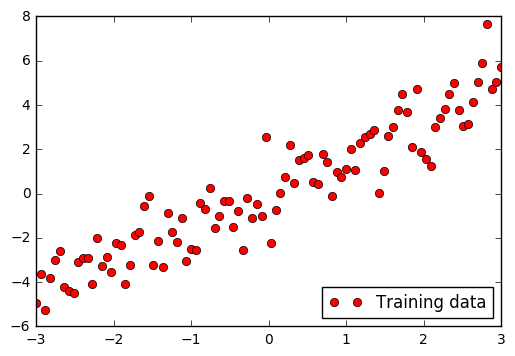

In [13]:
n_observations = 100
xs = np.linspace(-3, 3, n_observations)
ys = 1.5 * xs + np.random.randn(*xs.shape)

plt.figure(1)
plt.plot(xs,ys, 'ro', label='Training data')
#plt.axis('equal')
plt.legend(loc='lower right')

## Defining the model

In [14]:
# Defining Placeholders for the input and output of the network and Variables for Weights and Bias

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

def model(X,w,b):
    return tf.add(tf.mul(X, W), b)


Y_pred = model(X,W,b)

# %% Loss function will measure the distance between our observations
# and predictions and average over them.
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_observations - 1)


# %% Use gradient descent to optimize W,b
# Performs a single step in the negative gradient
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)



## Running the model in a Tf Session

In [15]:
#  We create a session to use the graph
sess = tf.Session()

# Initialize
init = tf.initialize_all_variables()
sess.run(init)

# Fit the training data
prev_training_cost = 0.0
n_epochs =100
for epoch_i in range(n_epochs):
    for (x, y) in zip(xs, ys):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
    # print(training_cost)

    # Allow the training to quit if we've reached a minimum
    if np.abs(prev_training_cost - training_cost) < 0.000001:
        break
    prev_training_cost = training_cost


# Final W and b
Wopt = sess.run(W)
bopt = sess.run(b)
fopt = model(X, Wopt, bopt) 
fopt = sess.run(fopt, feed_dict={X:xs})

## Plotting results

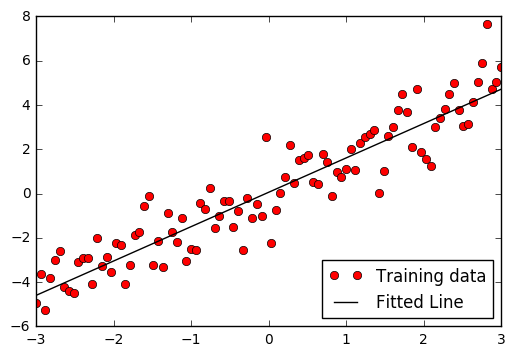

In [16]:
# Plot Results
plt.figure(2)
plt.plot(xs,ys, 'ro', label='Training data')
plt.plot(xs, fopt, 'k-', label='Fitted Line')

plt.legend(loc='lower right')